### Data Preparation Time Series Exercises

The end result of this exercise should be a file named prepare.py.

Using your store items data:

In [9]:
import numpy as np
import pandas as pd
import requests

from datetime import timedelta, datetime
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [10]:
def get_all(endpoint):
    """ Read all records on all pages """
    
    if endpoint not in ["sales", "items", "stores"]:
        return "Not available from this API. Check the documentation"
    
    host = "https://python.zgulde.net/"
    api = "api/v1/"

    url = host + api + endpoint

    response = requests.get(url)

    if response.ok:
        payload = response.json()["payload"]

        # endpoint should be "items", "sales", or "stores"
        contents = payload[endpoint]

        # Make a dataframe of the contents
        df = pd.DataFrame(contents)

        next_page = payload["next_page"]

        while next_page:
            # Append the next_page url piece
            url = host + next_page
            response = requests.get(url)

            payload = response.json()["payload"]

            next_page = payload["next_page"]    
            contents = payload[endpoint]

            df = pd.concat([df, pd.DataFrame(contents)])

            df = df.reset_index(drop=True)

    return df

In [11]:
items = get_all('items')
stores = get_all('stores')
sales = get_all("sales")

In [12]:
sales_and_stores = pd.merge(sales, 
                        stores,
                        how="left",
                        left_on="store",
                        right_on="store_id")
sales_and_stores.head()

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [19]:
everything = pd.merge(sales_and_stores,
                      items,
                      how="left",
                      left_on="item",
                      right_on="item_id")

1. Convert date column to datetime format.

In [20]:
everything.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store          913000 non-null  int64  
 5   store_address  913000 non-null  object 
 6   store_city     913000 non-null  object 
 7   store_id       913000 non-null  int64  
 8   store_state    913000 non-null  object 
 9   store_zipcode  913000 non-null  object 
 10  item_brand     913000 non-null  object 
 11  item_id        913000 non-null  int64  
 12  item_name      913000 non-null  object 
 13  item_price     913000 non-null  float64
 14  item_upc12     913000 non-null  object 
 15  item_upc14     913000 non-null  object 
dtypes: float64(2), int64(5), object(9)
memory usage: 118.4+ MB


In [55]:
everything.sale_date = pd.to_datetime(everything.sale_date)
df = everything
df.head()

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,1,13.0,2013-01-01,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,2013-01-02,2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,2013-01-03,3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,2013-01-04,4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,2013-01-05,5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


2. Plot the distribution of sale_amount and item_price.

<AxesSubplot:xlabel='sale_date'>

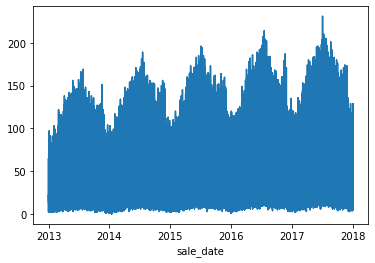

In [30]:
df.sale_amount.plot()

<AxesSubplot:xlabel='sale date', ylabel='sale amount'>

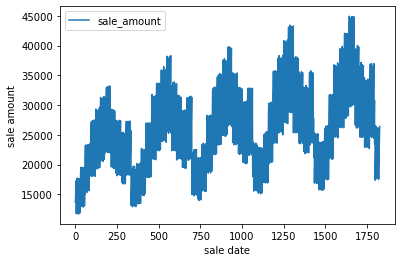

In [45]:
df.groupby(['sale_date']).sale_amount.sum().reset_index().plot(xlabel = 'sale date', ylabel = 'sale amount')

<AxesSubplot:xlabel='sale_date'>

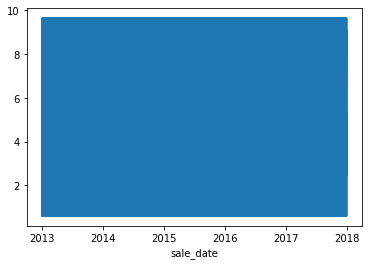

In [25]:
df.item_price.plot()

<AxesSubplot:xlabel='sale date', ylabel='item price'>

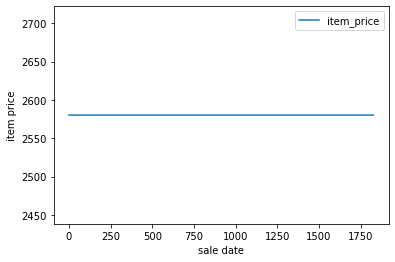

In [42]:
df.groupby(['sale_date']).item_price.sum().reset_index().plot(xlabel = 'sale date', ylabel = 'item price')

array([[<AxesSubplot:title={'center':'sale_amount'}>,
        <AxesSubplot:title={'center':'item_price'}>]], dtype=object)

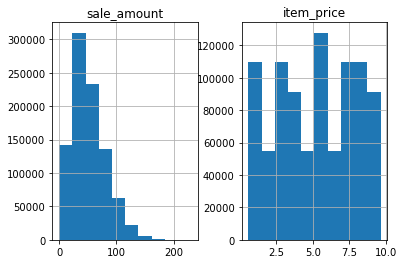

In [49]:
df[['sale_amount', 'item_price']].hist()

3. Set the index to be the datetime variable.

In [56]:
df = everything.set_index('sale_date').sort_index()
df.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


4. Add a 'month' and 'day of week' column to your dataframe.

In [60]:
df['month'] = df.index.month_name()
df['weekday'] = df.index.day_name()
df.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,218.40
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday,125.55
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,453.60
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,294.00


5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [59]:
df['sales_total'] = df['sale_amount'] * df['item_price']
df.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00


6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

#### Part II:

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

1. Convert date column to datetime format.